# The First Stars: Formation under X-ray Feedback -- Structure Visualization

This notebook generates all simulation results figures for my current paper.  All simulations run on stampede.tacc.utexas.edu

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc('font', size=20.)
mpl.rc('font', family='serif')
mpl.rc('text', usetex=True)

In [2]:
import pyGadget

## Density structure zoom-in to central minihalo

Use the final snapshot of the vanilla simulation.

In [3]:
sims = ['vanilla', 'xr_tau_J0', 'xr_tau_J1', 'xr_tau_J2', 'xr_tau_J3', 'XR_sfr_1e-1', 'XR_sfr_1e-2', 'XR_sfr_1e-3']
n0 = [355, 306, 327, 271, 235, 200, 201, 269]
n5k = [1900, 1851, 1870, 1810, 1758, 1700, 1701, 1794]
t0 = '_t0'
t5k = '_t5k'
n, tag = n5k, t5k

In [4]:
i = 0
sim = pyGadget.sim.Simulation('stampede/'+sims[i])
sim.refine_by_mass(False)
sim.set_coordinate_system('physical')
snap = sim.load_snapshot(n[i])

In [5]:
imzoom = []
for scale in ['10pc', '1pc', '5000AU', '20626AU']:
    imzoom.append(pyGadget.visualize.project(snap, 'ndensity', scale, 'xz', centering='avg'))
snap.close()

Calculating...
Center averaged over 3935 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 2.761e+03 2.757e+03 2.722e+03
 x:: max: 5.000e+00 min: -4.999e+00
 y:: max: 5.000e+00 min: -5.000e+00
ndensity:: min: 1.090e+01 max: 6.314e+08
log(ndensity):: min: 1.037e+00 max: 8.800e+00
Calculating...
Center averaged over 3935 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: -1.341e-13 3.381e-13 2.866e-13
 x:: max: 4.996e-01 min: -4.999e-01
 y:: max: 5.000e-01 min: -4.999e-01
ndensity:: min: 3.261e+03 max: 9.903e+11
log(ndensity):: min: 3.513e+00 max: 1.200e+01
Calculating...
Center averaged over 3935 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 5.695e+08 5.687e+08 5.615e+08
 x:: max: 2.497e+03 min: -2.491e+03
 y:: max: 2.495e+03 min: -2.500e+03
ndensity:: min: 7.131e+07 max:

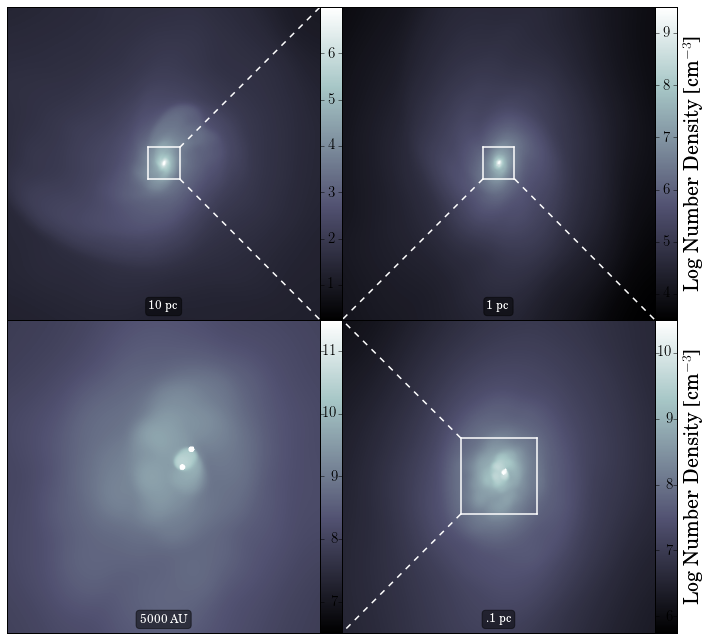

In [6]:
from mpl_toolkits.axes_grid1 import ImageGrid

scales = ['10 pc',  '1 pc', '5000 AU', '.1 pc']
ratio = [.1, .1, None, .2424]
zoom = ['right', 'down', None, 'left']
clims = [(.25,7.),(3.5,9.5),(6.5,11.5),(5.75,10.5)]
ticks = [(1,2,3,4,5,6), (4,5,6,7,8,9), (7,8,9,10,11),(6,7,8,9,10)]
cpad = [-15, -15, -18, -18]
clabel = [False, True, False, True]
bbox_props = dict(boxstyle="round", fc="k", ec="k", alpha=0.5)
zc = 'w'
zls = '--'
zlw = 1.5
fig = plt.figure(1, (12., 12.), dpi=600)
grid = ImageGrid(fig, 111, # similar to subplot(111)
                nrows_ncols = (2, 2), # creates 2x2 grid of axes
                axes_pad=0.0, # pad between axes in inch.
                cbar_mode = 'each', cbar_size='7%', cbar_pad=0.
                )

for i in range(4):
    x = imzoom[i][0]
    y = imzoom[i][1]
    im = imzoom[i][2]
    ax = grid[i]
    img = ax.imshow(im, cmap=plt.cm.bone, origin='lower')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    img.set_clim(clims[i])
    
    cb = plt.colorbar(img, cax=grid.cbar_axes[i])
    cb.set_ticks(ticks[i])
    cb.ax.tick_params(left='on', pad=cpad[i],
                      labelsize=15, labelcolor='k', labelleft='on', labelright='off')
    if clabel[i]: cb.set_label('Log Number Density [cm$^{-3}$]')
        
    ax.text(0.5, 0.025, scales[i], color='w', ha='center', va='bottom', size=12, 
            transform=grid[i].transAxes, bbox=bbox_props)
    
    if ratio[i]:
        axmin, axmax = ax.get_xlim()
        axlength = axmax - axmin
        mid = axlength/2
        s = ratio[i] * axlength
        s00 = [mid - s/2, mid - s/2]
        s01 = [mid - s/2, mid + s/2]
        s11 = [mid + s/2, mid + s/2]
        ax.add_line(plt.Line2D(s00, s01, c=zc, lw=zlw))
        ax.add_line(plt.Line2D(s11, s01, c=zc, lw=zlw))
        ax.add_line(plt.Line2D(s01, s00, c=zc, lw=zlw))
        ax.add_line(plt.Line2D(s01, s11, c=zc, lw=zlw))
        if zoom[i] == 'right':
            ax.add_line(plt.Line2D([mid+s/2, axmax], [mid+s/2, axmax], c=zc, lw=zlw, ls=zls))
            ax.add_line(plt.Line2D([mid+s/2, axmax], [mid-s/2, axmin], c=zc, lw=zlw, ls=zls))
        elif zoom[i] == 'down':
            ax.add_line(plt.Line2D([mid-s/2, axmin], [mid-s/2, axmin], c=zc, lw=zlw, ls=zls))
            ax.add_line(plt.Line2D([mid+s/2, axmax], [mid-s/2, axmin], c=zc, lw=zlw, ls=zls))
        elif zoom[i] == 'left':
            ax.add_line(plt.Line2D([mid-s/2, axmin], [mid+s/2, axmax], c=zc, lw=zlw, ls=zls))
            ax.add_line(plt.Line2D([mid-s/2, axmin], [mid-s/2, axmin], c=zc, lw=zlw, ls=zls))
plt.show()
fig.savefig('figures/structure/halo-structure-'+sim.name.split('/')[-1]+tag+'.png', bbox_inches='tight', dpi=100)

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot(llim, ulim):
    i=0
    f,ax = plt.subplots(figsize=(9.,9.))
    img = ax.imshow(im, cmap=plt.cm.bone, origin='lower')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    img.set_clim((llim, ulim))

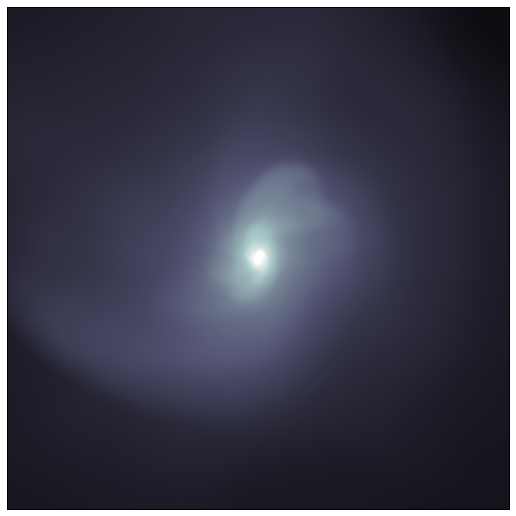

In [8]:
from IPython.html import widgets
i = 0
im = imzoom[i][2]
widgets.interact(plot, llim=(-1., 2, .25), ulim=(4., 8.0, .25))

<function __main__.plot>

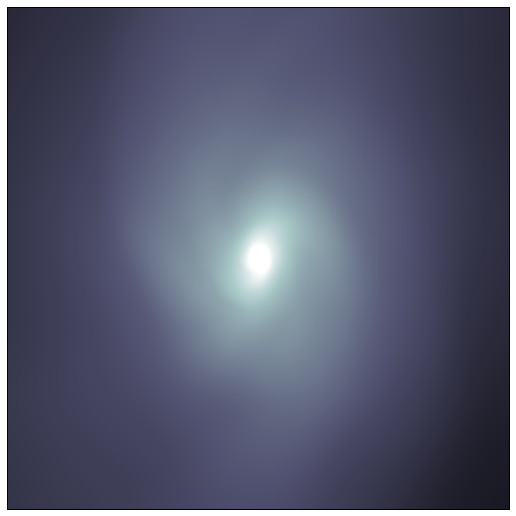

In [9]:
i = 1
im = imzoom[i][2]
widgets.interact(plot, llim=(1., 5., .25), ulim=(5., 10.0, .25))

<function __main__.plot>

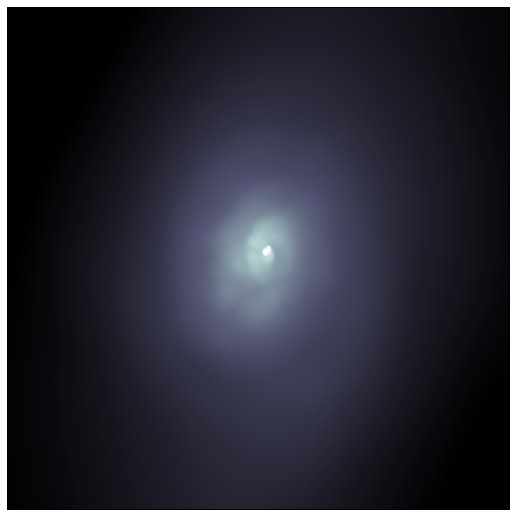

In [10]:
i = 3
im = imzoom[i][2]
widgets.interact(plot, llim=(5., 8., .25), ulim=(9., 12.0, .25))

<function __main__.plot>

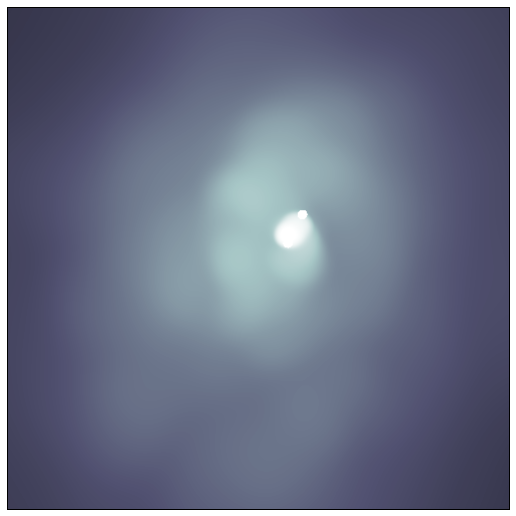

In [11]:
i = 2
im = imzoom[i][2]
widgets.interact(plot, llim=(5., 9., .25), ulim=(9., 12.25, .25))